# Analisis de Datos del Grupo G
## Universidad de Flores y Universidad de Villa María



In [27]:
#Realizamos los imports necesarios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
plt.rcParams['figure.dpi'] = 130
plt.rcParams['figure.figsize'] = (8,12)
sns.set_style('dark')

In [29]:
#Colocamos el nombre de las universidades en dos variables
#Para una futura reutilización del codigo

university1 = 'GrupoA_flores_universidad'
university1_name = 'Universidad de Flores'

university2 = 'GrupoA_villa_maria_universidad'
university2_name = 'Universidad de Villa María'



In [30]:
df_1 = pd.read_csv(f'../../datasets/{university1}_process.txt', sep='\t')
df_2 = pd.read_csv(f'../../datasets/{university2}_process.txt', sep='\t')

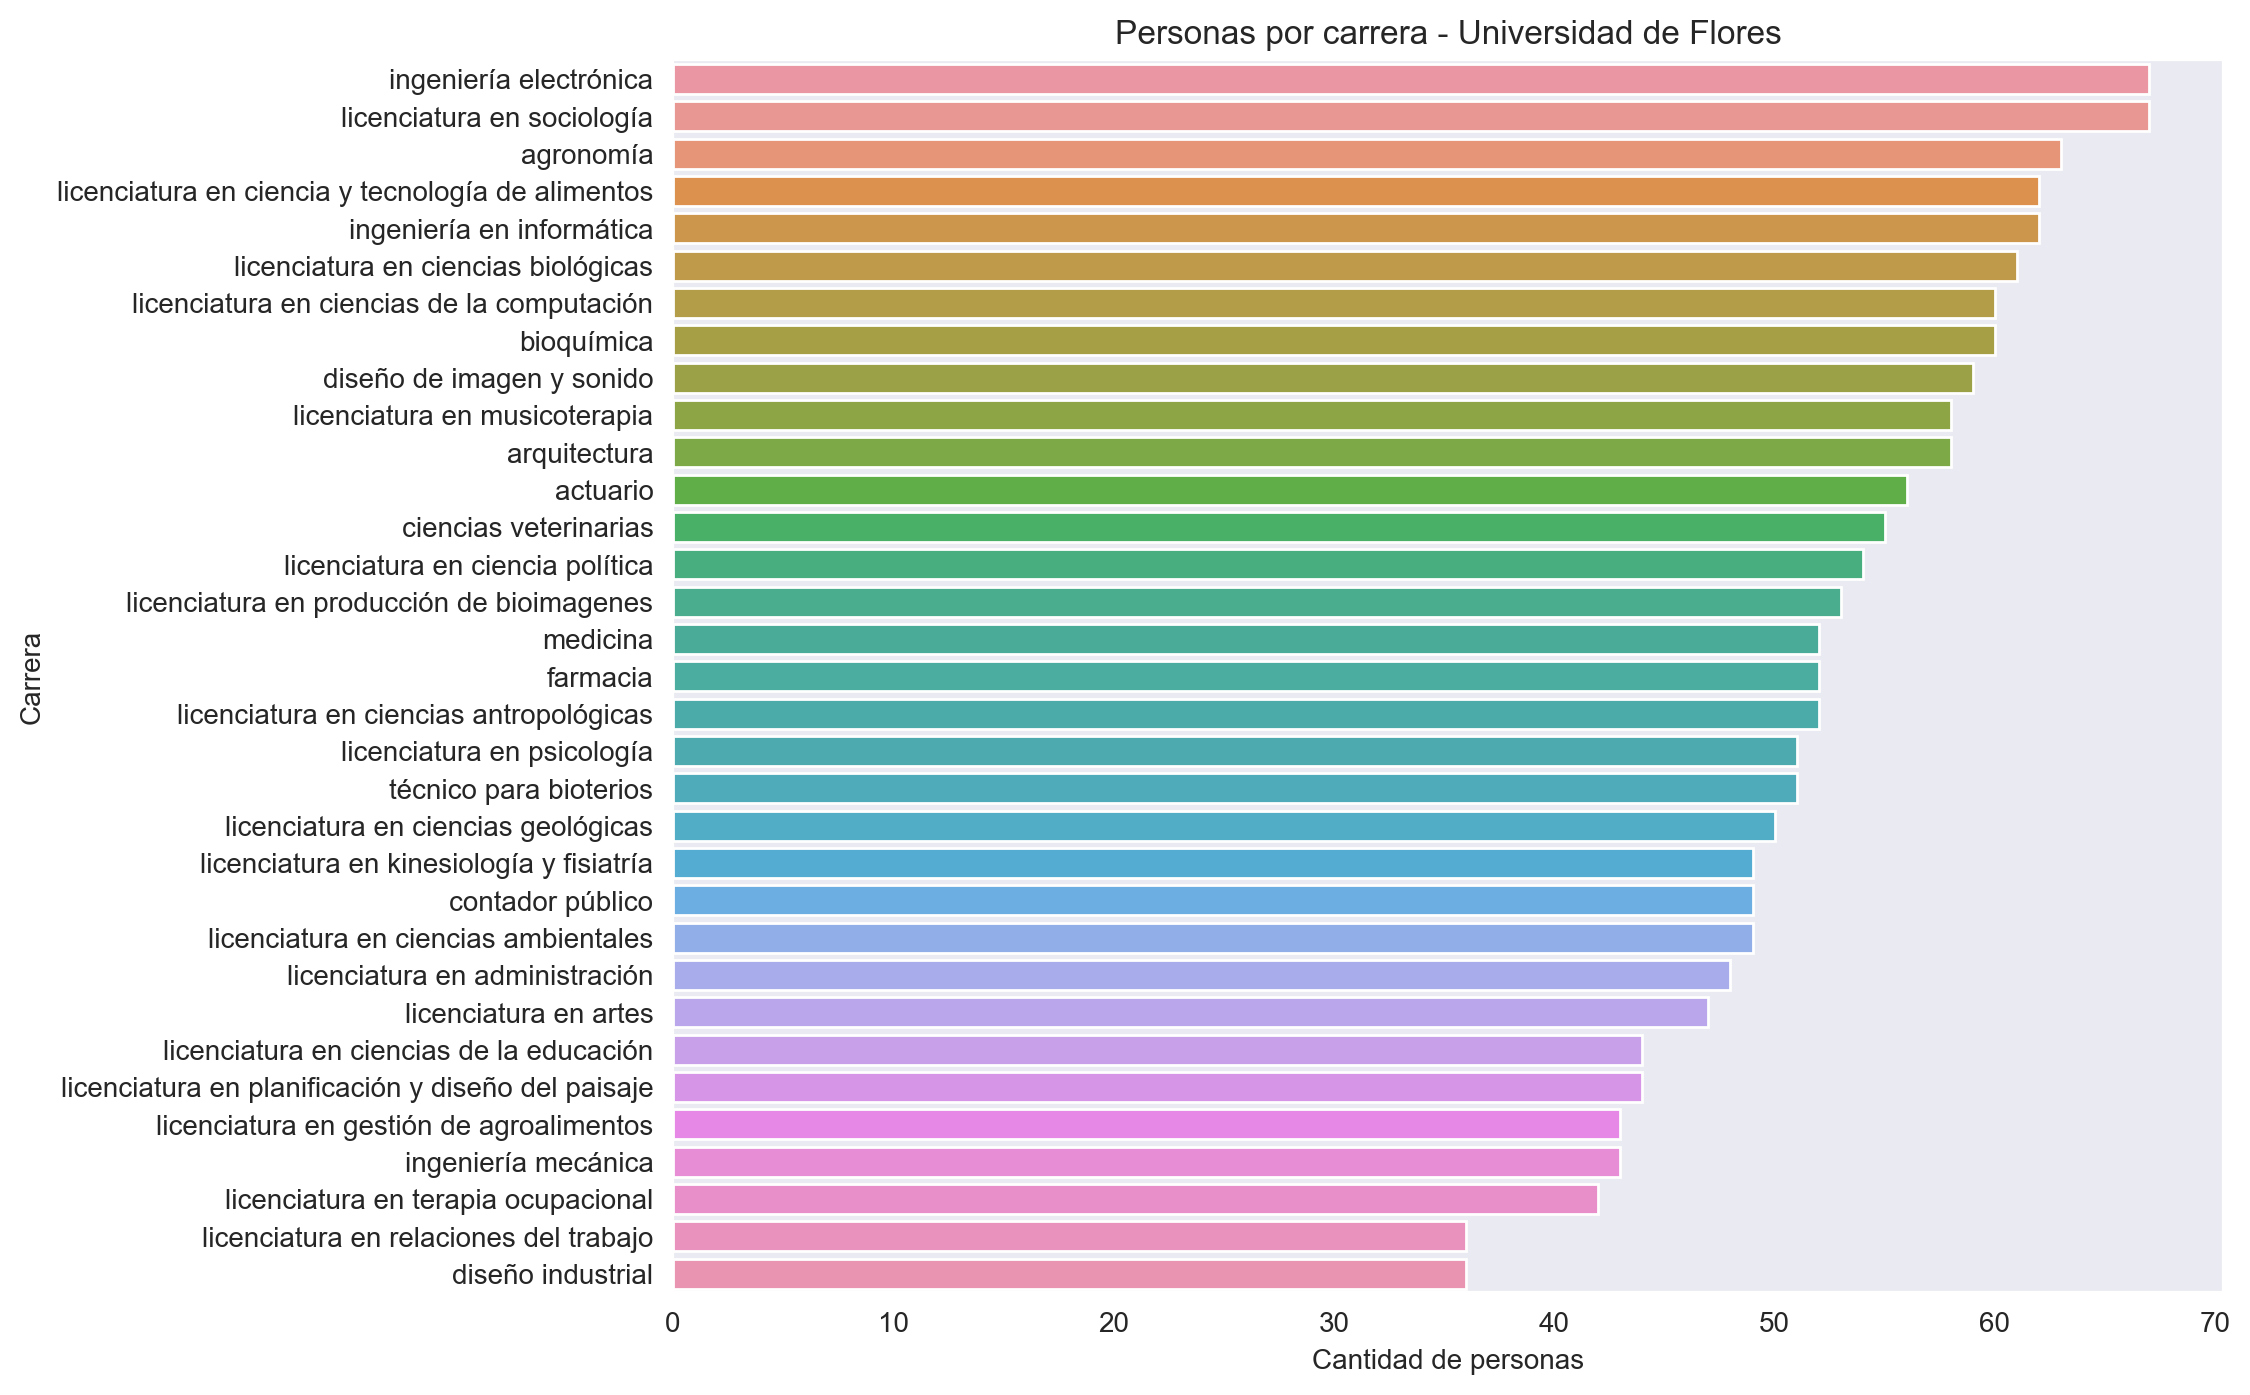

In [31]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career')

plt.title(f'Personas por carrera - {university1_name}')
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

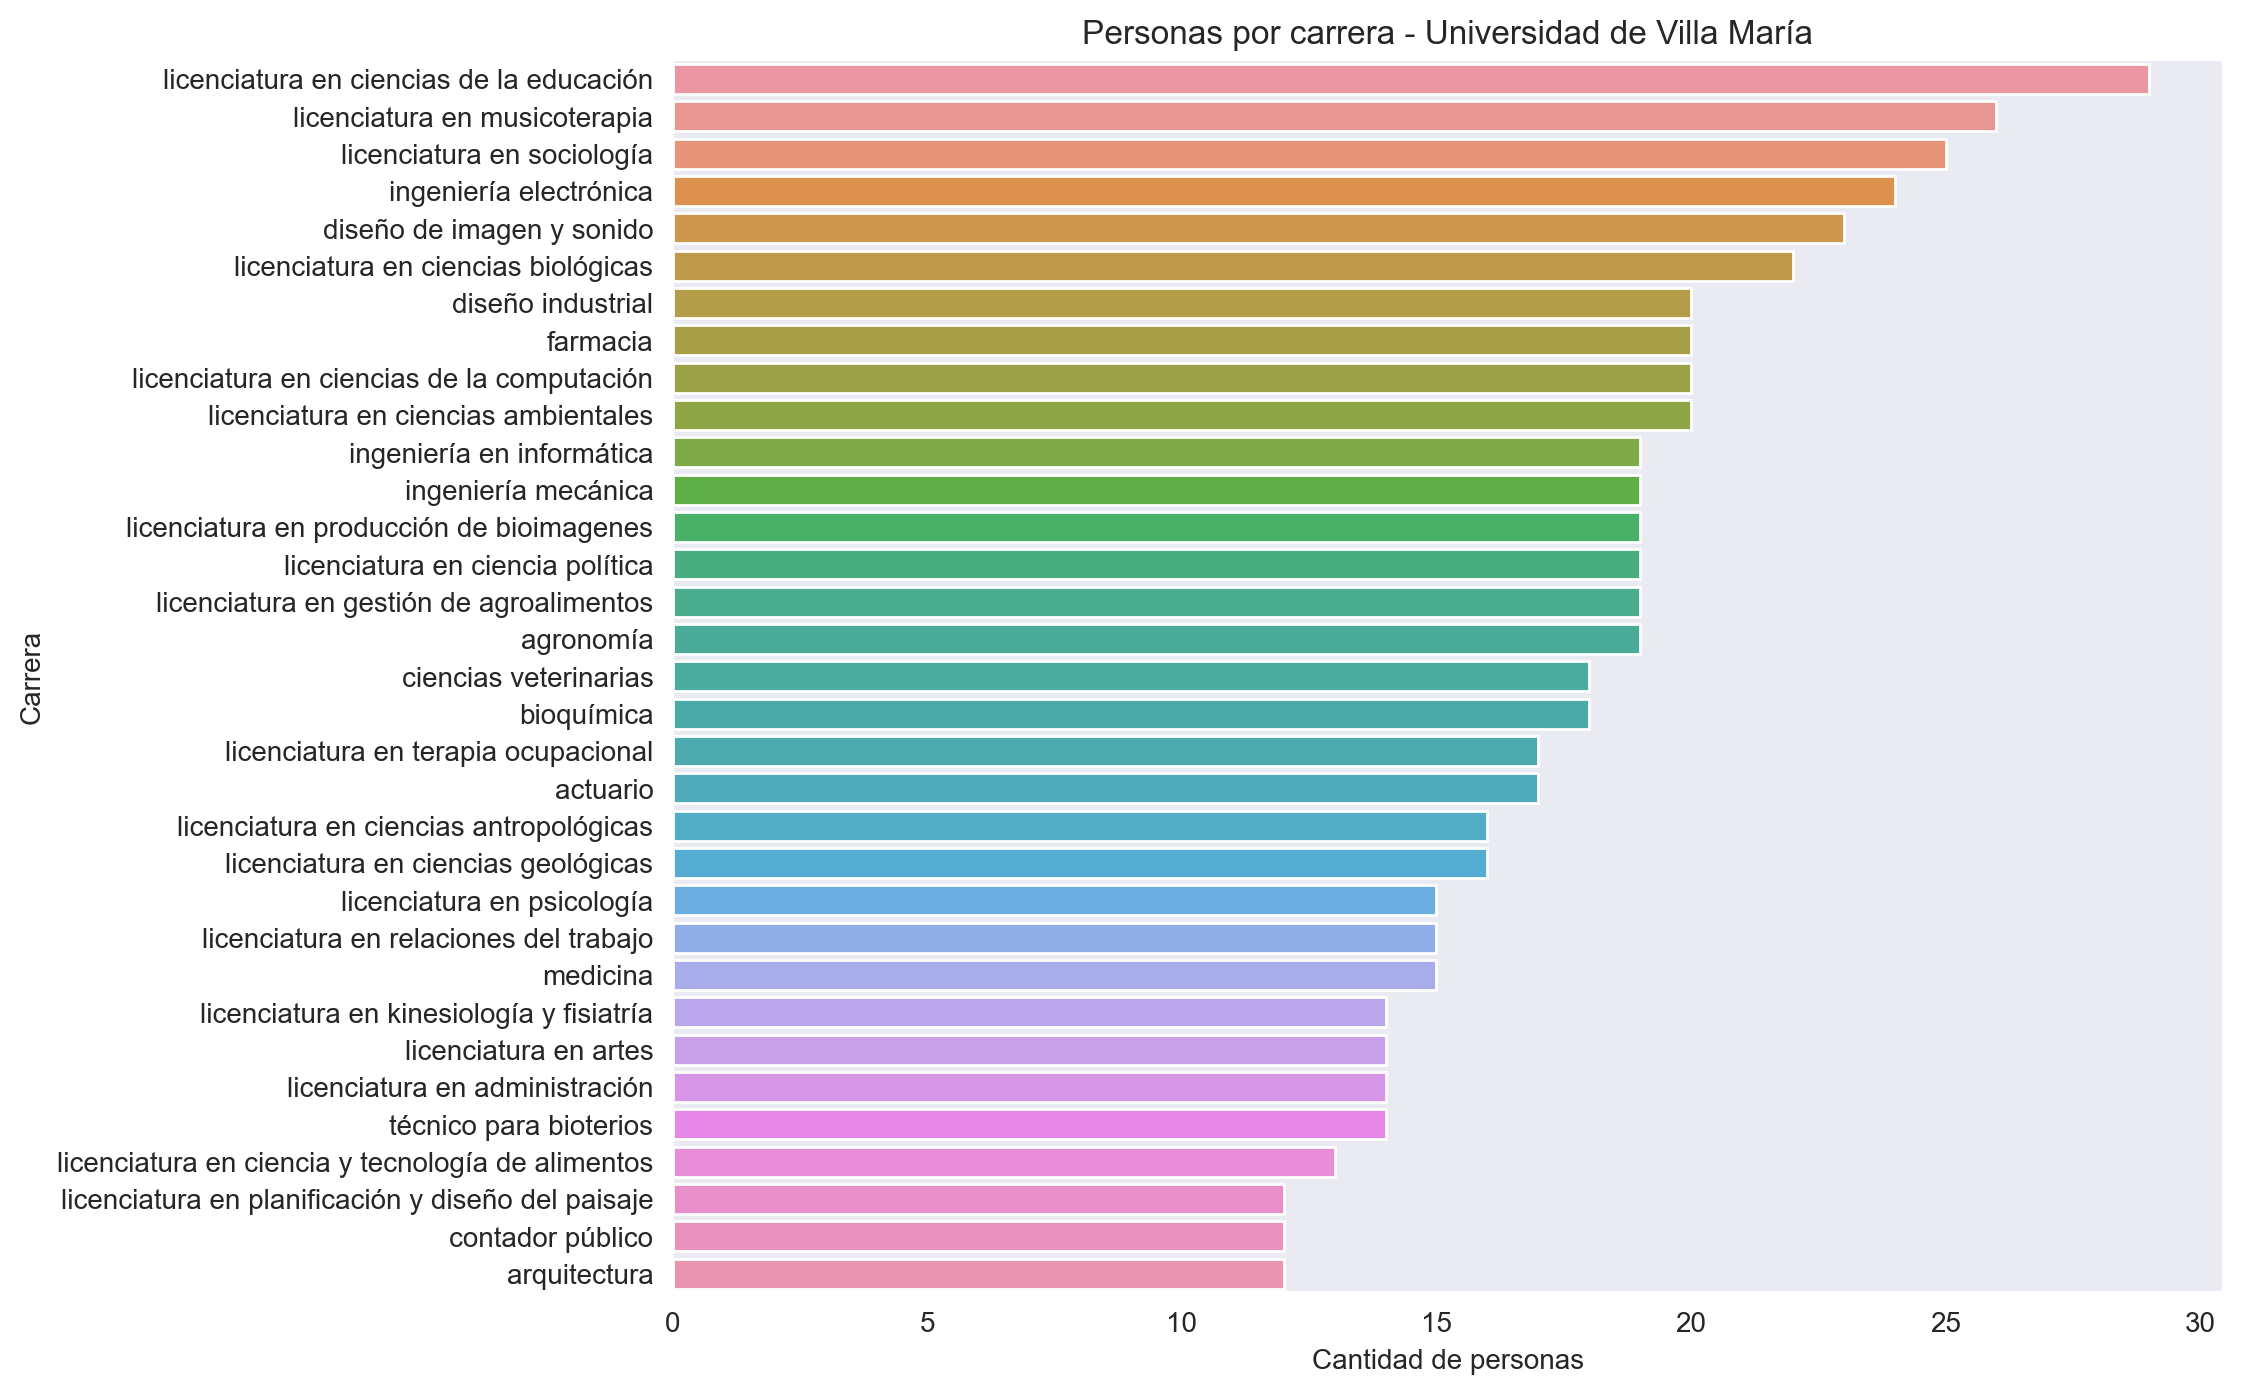

In [32]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career')

plt.title(f'Personas por carrera - {university2_name}')
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

In [33]:
df_1.columns

Index(['university', 'career', 'inscription_date', 'first_name', 'gender',
       'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [34]:
df_1.shape

(1733, 9)

In [35]:
df_1.head()

,university,career,inscription_date,first_name,gender,age,postal_code,location,email
0,universidad de flores,licenciatura en kinesiología y fisiatría,2020-11-01,chelsea taylor,female,21,6200,REALICO,michael67@gmail.com
1,universidad de flores,ingeniería en informática,2020-12-09,daniel brown,male,21,1633,EMPALME,khodges@gmail.com
2,universidad de flores,licenciatura en ciencias biológicas,2020-09-23,john powell,male,54,1633,EMPALME,joshua48@yahoo.com
3,universidad de flores,licenciatura en ciencia y tecnología de alimentos,2020-11-03,rachel wade,female,21,1633,EMPALME,jortiz@hotmail.com
4,universidad de flores,licenciatura en ciencias antropológicas,2020-09-11,amy scott,female,31,5777,ADOLFO RODRIGUEZ SAA,dmadden@hotmail.com


In [36]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        1733 non-null   object
 1   career            1733 non-null   object
 2   inscription_date  1733 non-null   object
 3   first_name        1733 non-null   object
 4   gender            1733 non-null   object
 5   age               1733 non-null   int64 
 6   postal_code       1733 non-null   int64 
 7   location          1733 non-null   object
 8   email             1733 non-null   object
dtypes: int64(2), object(7)
memory usage: 122.0+ KB


In [37]:
df_1.describe()

,age,postal_code
count,1733.000000,1733.000000
mean,35.808425,4890.144259
std,19.083208,2220.970797
min,19.000000,1601.000000
25%,21.000000,3027.000000
50%,22.000000,4728.000000
75%,51.000000,6537.000000
max,79.000000,9421.000000


In [38]:
df_2.describe()

,age,postal_code
count,595.000000,595.000000
mean,24.752941,4734.013445
std,7.893726,2076.609956
min,19.000000,1602.000000
25%,21.000000,2848.000000
50%,21.000000,4655.000000
75%,21.000000,6420.000000
max,50.000000,9225.000000


<AxesSubplot:xlabel='gender', ylabel='age'>

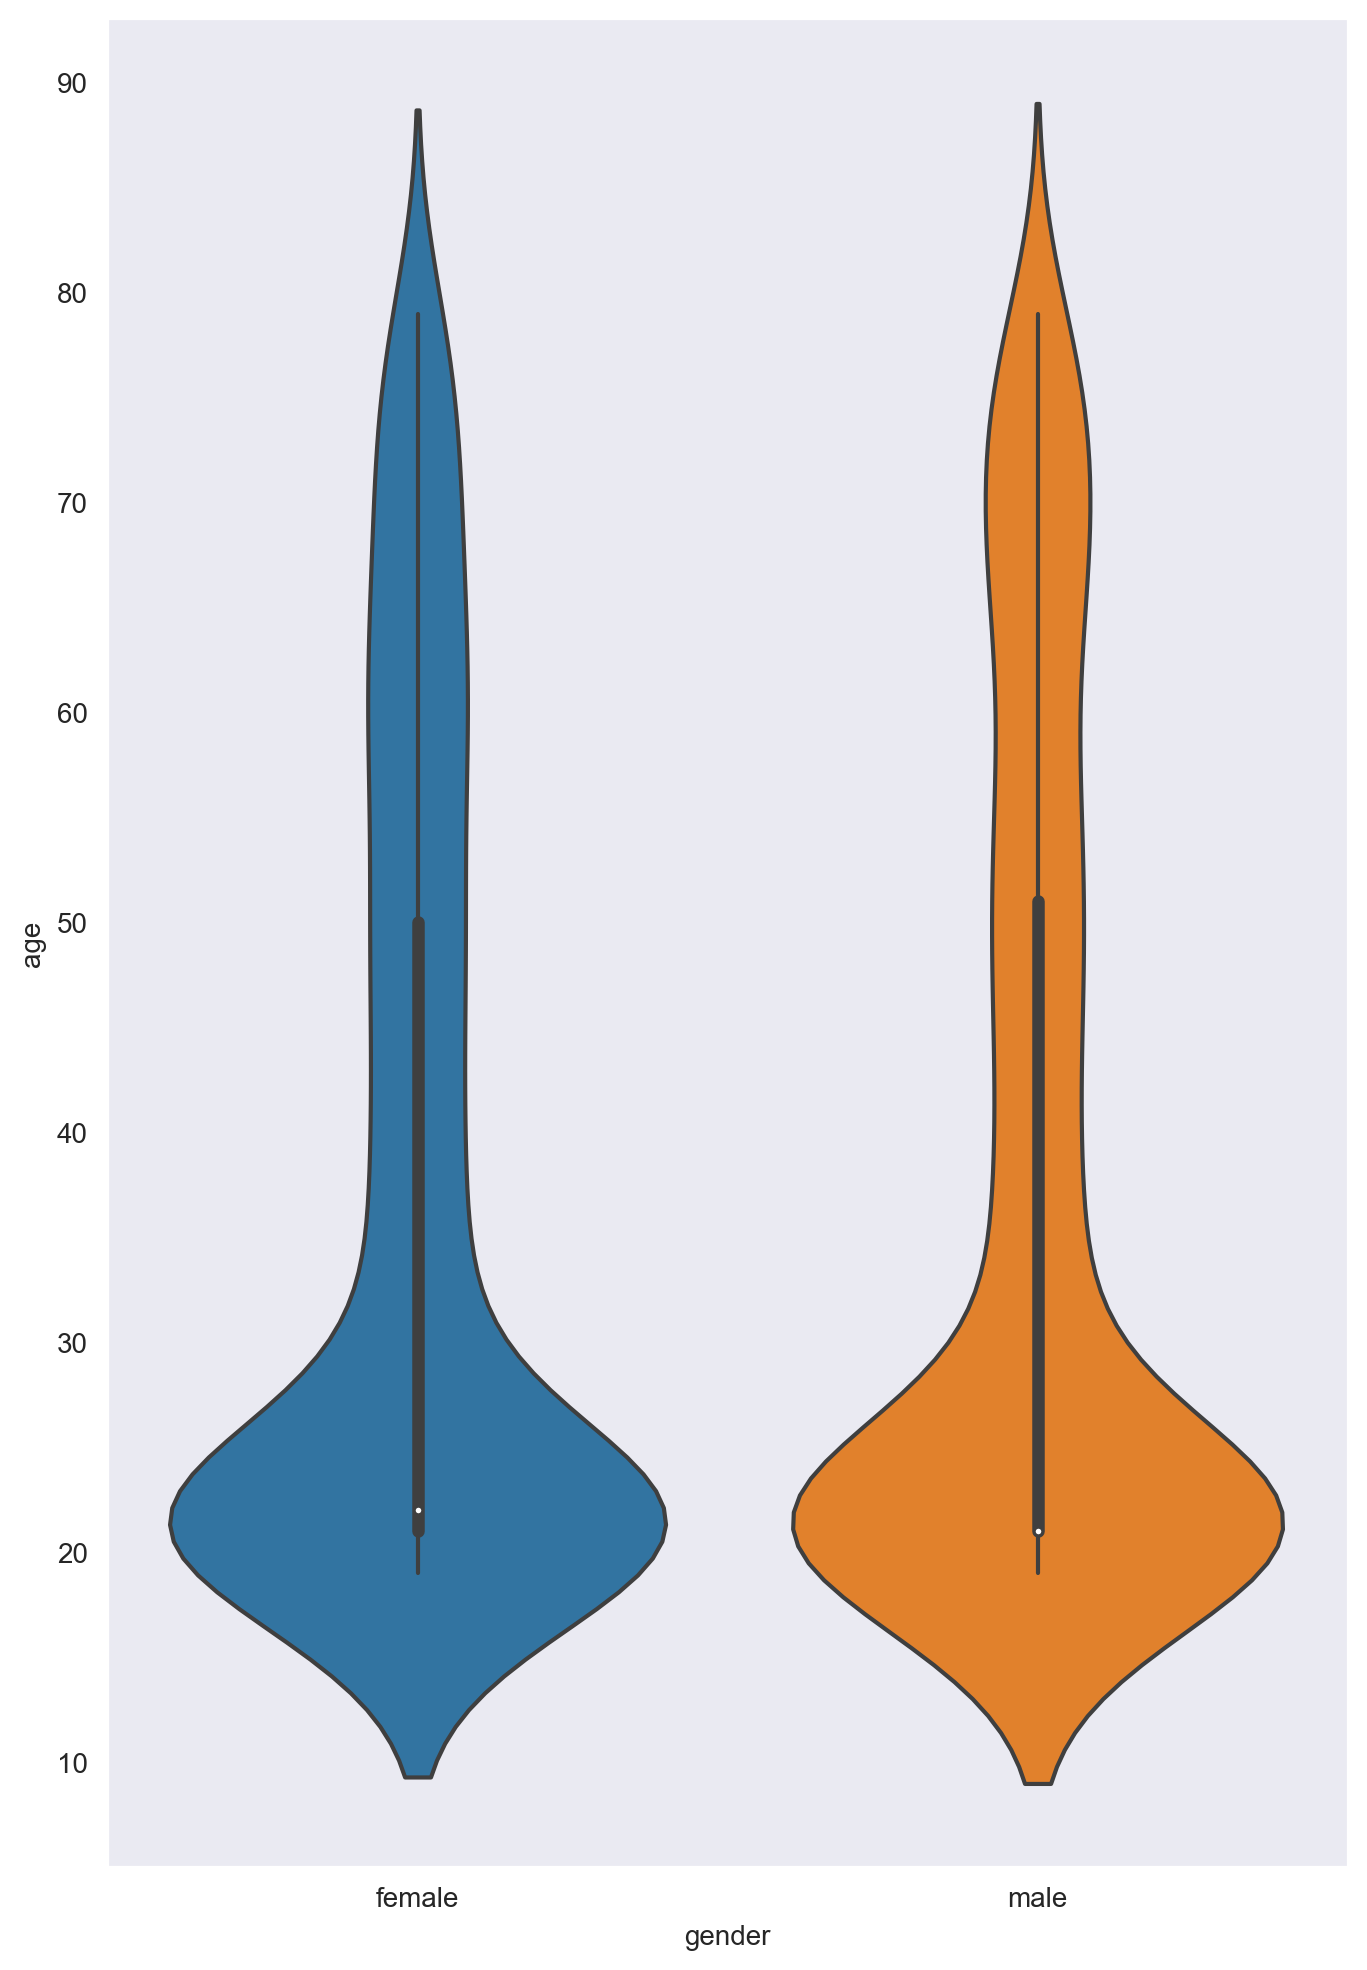

In [39]:
sns.violinplot(data=df_1,y='age', x='gender')

In [40]:
df_1.inscription_date = pd.to_datetime(df_1.inscription_date)
df_2.inscription_date = pd.to_datetime(df_2.inscription_date)

<AxesSubplot:xlabel='inscription_date'>

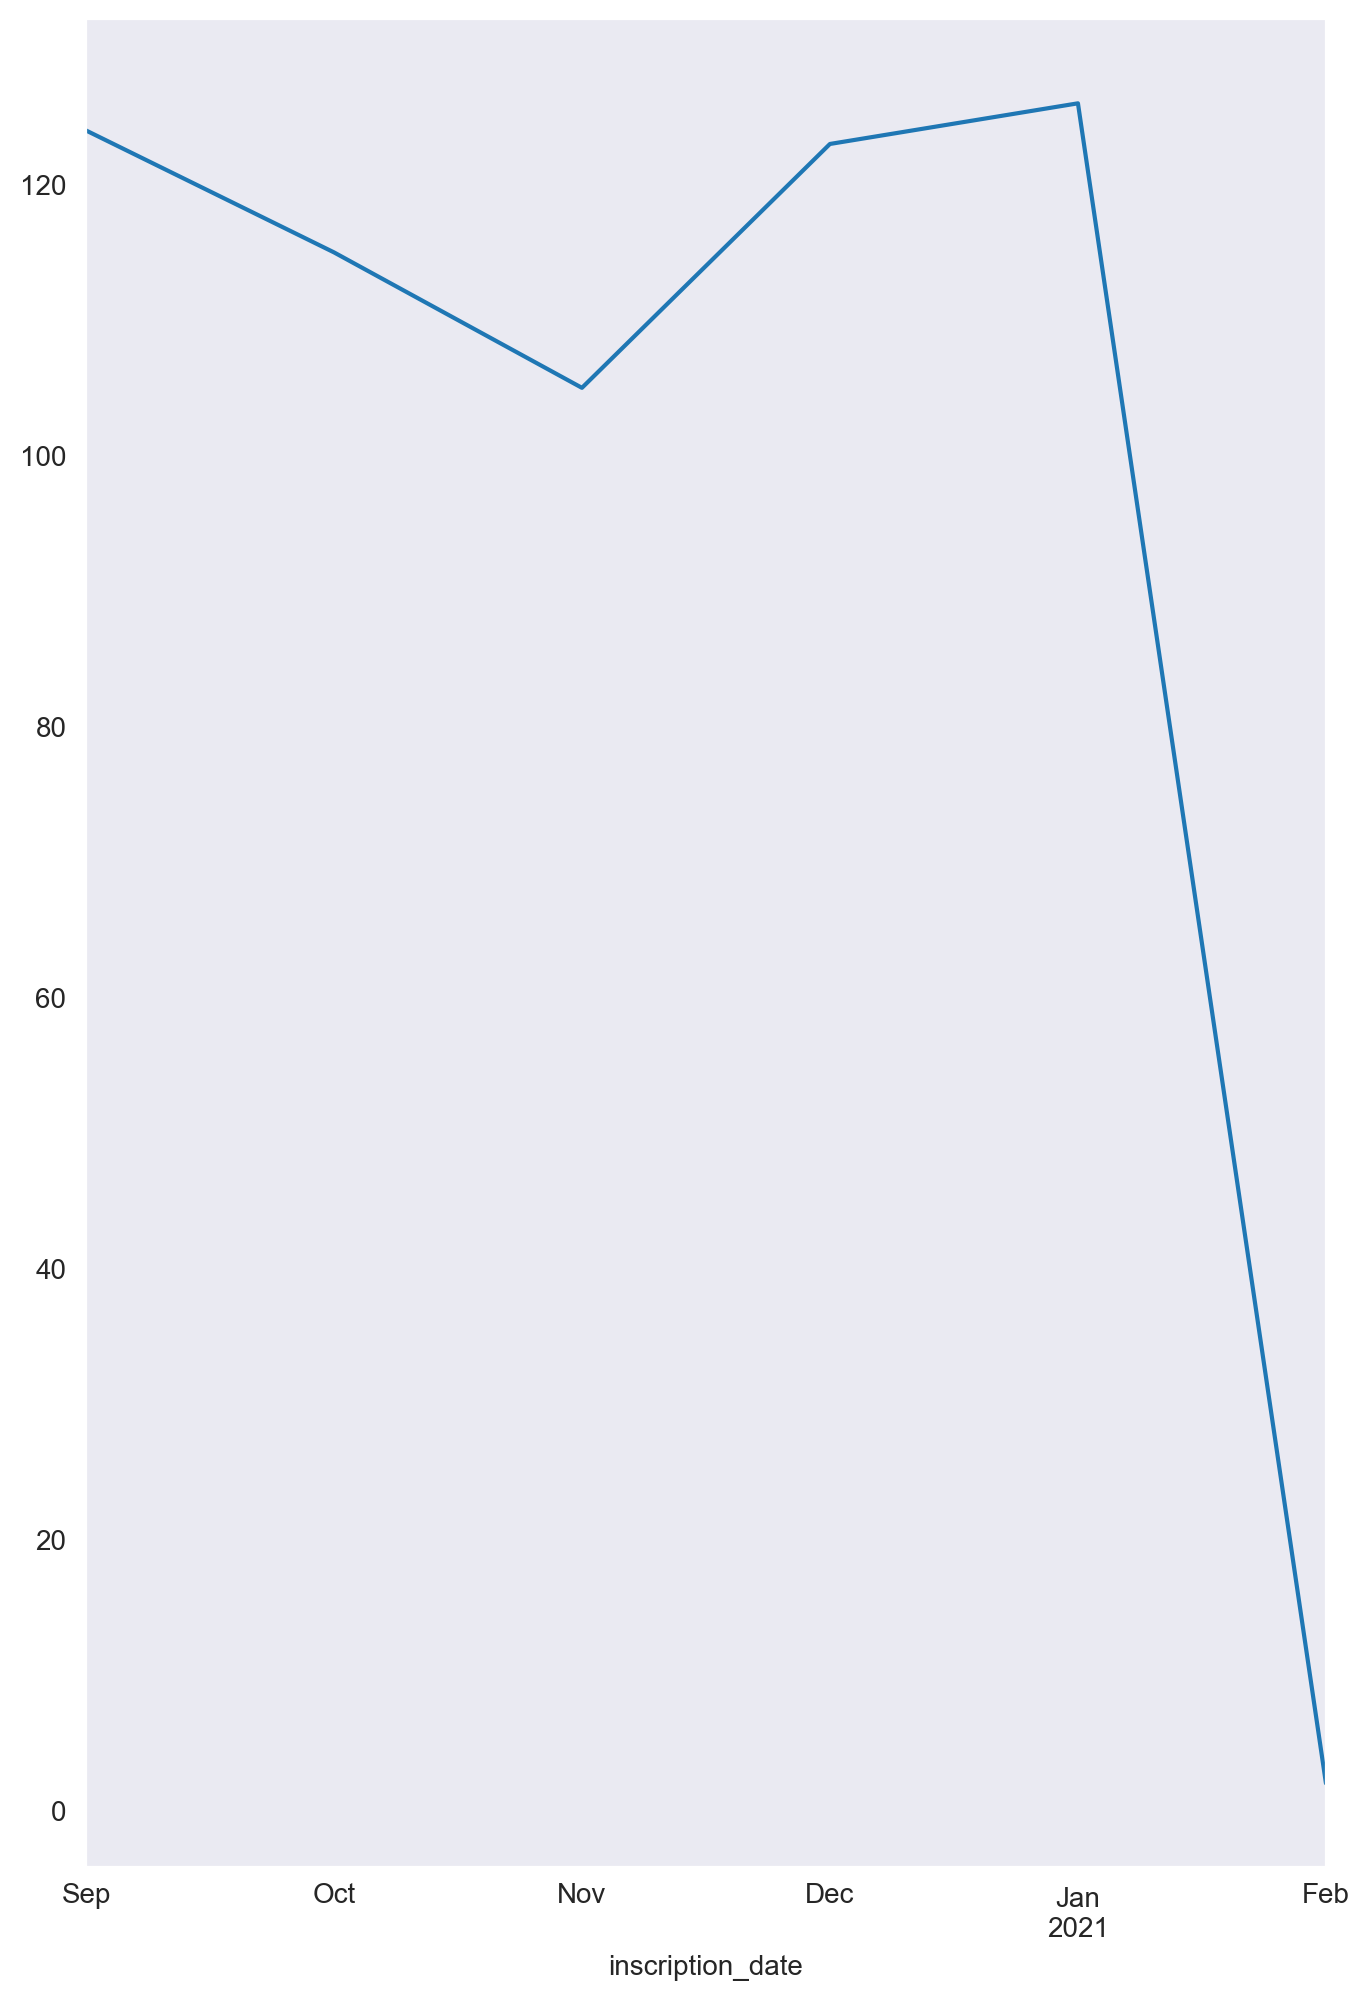

In [41]:
df_2.set_index('inscription_date').groupby([pd.Grouper(freq="M",)]).size().plot()

In [42]:
'agronomía','bioquímica','ciencias veterinarias','farmacia','licenciatura en ciencias biológicas', 'licenciatura en ciencia y tecnología de alimentos','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 'licenciatura en gestión de agroalimentos', 'licenciatura en kinesiología y fisiatría', 'licenciatura en planificación y diseño del paisaje','licenciatura en producción de bioimagenes','medicina','técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación',

('agronomía',
 'bioquímica',
 'ciencias veterinarias',
 'farmacia',
 'licenciatura en ciencias biológicas',
 'licenciatura en ciencia y tecnología de alimentos',
 'licenciatura en ciencias ambientales',
 'licenciatura en ciencias biológicas',
 'licenciatura en ciencias geológicas',
 'licenciatura en gestión de agroalimentos',
 'licenciatura en kinesiología y fisiatría',
 'licenciatura en planificación y diseño del paisaje',
 'licenciatura en producción de bioimagenes',
 'medicina',
 'técnico para bioterios',
 'ingeniería electrónica',
 'ingeniería en informática',
 'ingeniería mecánica',
 'licenciatura en ciencias de la computación')

In [43]:
'diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia',

('diseño industrial',
 'diseño de imagen y sonido',
 'licenciatura en artes',
 'licenciatura en musicoterapia')

In [44]:
'actuario', 'contador público','licenciatura en administración',

('actuario', 'contador público', 'licenciatura en administración')

In [45]:
'licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional'

('licenciatura en ciencias antropológicas',
 'licenciatura en ciencias de la educación',
 'licenciatura en psicología',
 'licenciatura en relaciones del trabajo',
 'licenciatura en sociología',
 'licenciatura en terapia ocupacional')

In [46]:
clasificador ={
    'exactas_nat':['agronomía','bioquímica','ciencias veterinarias','farmacia','licenciatura en ciencias biológicas', 'licenciatura en ciencia y tecnología de alimentos','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 'licenciatura en gestión de agroalimentos', 'licenciatura en kinesiología y fisiatría', 'licenciatura en planificación y diseño del paisaje','licenciatura en producción de bioimagenes','medicina','técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia'],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}

clasificador

{'exactas_nat': ['agronomía',
  'bioquímica',
  'ciencias veterinarias',
  'farmacia',
  'licenciatura en ciencias biológicas',
  'licenciatura en ciencia y tecnología de alimentos',
  'licenciatura en ciencias ambientales',
  'licenciatura en ciencias biológicas',
  'licenciatura en ciencias geológicas',
  'licenciatura en gestión de agroalimentos',
  'licenciatura en kinesiología y fisiatría',
  'licenciatura en planificación y diseño del paisaje',
  'licenciatura en producción de bioimagenes',
  'medicina',
  'técnico para bioterios',
  'ingeniería electrónica',
  'ingeniería en informática',
  'ingeniería mecánica',
  'licenciatura en ciencias de la computación'],
 'diseño_art': ['diseño industrial',
  'diseño de imagen y sonido',
  'licenciatura en artes',
  'licenciatura en musicoterapia'],
 'empresarial': ['actuario',
  'contador público',
  'licenciatura en administración'],
 'sociales': ['licenciatura en ciencias antropológicas',
  'licenciatura en ciencias de la educación',
 

In [47]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','bioquímica','ciencias veterinarias','farmacia','licenciatura en ciencias biológicas', 'licenciatura en ciencia y tecnología de alimentos','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 'licenciatura en gestión de agroalimentos', 'licenciatura en kinesiología y fisiatría', 'licenciatura en planificación y diseño del paisaje','licenciatura en producción de bioimagenes','medicina','técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia'],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    else:
        return "Sociales"


In [48]:
df_1['tipo_career'] = df_1.career.apply(clasificador)

[Text(0, 0, 'Exactas y Naturales'),
 Text(1, 0, 'Sociales'),
 Text(2, 0, 'Artes y Diseño'),
 Text(3, 0, 'Ciencias Empresariales')]

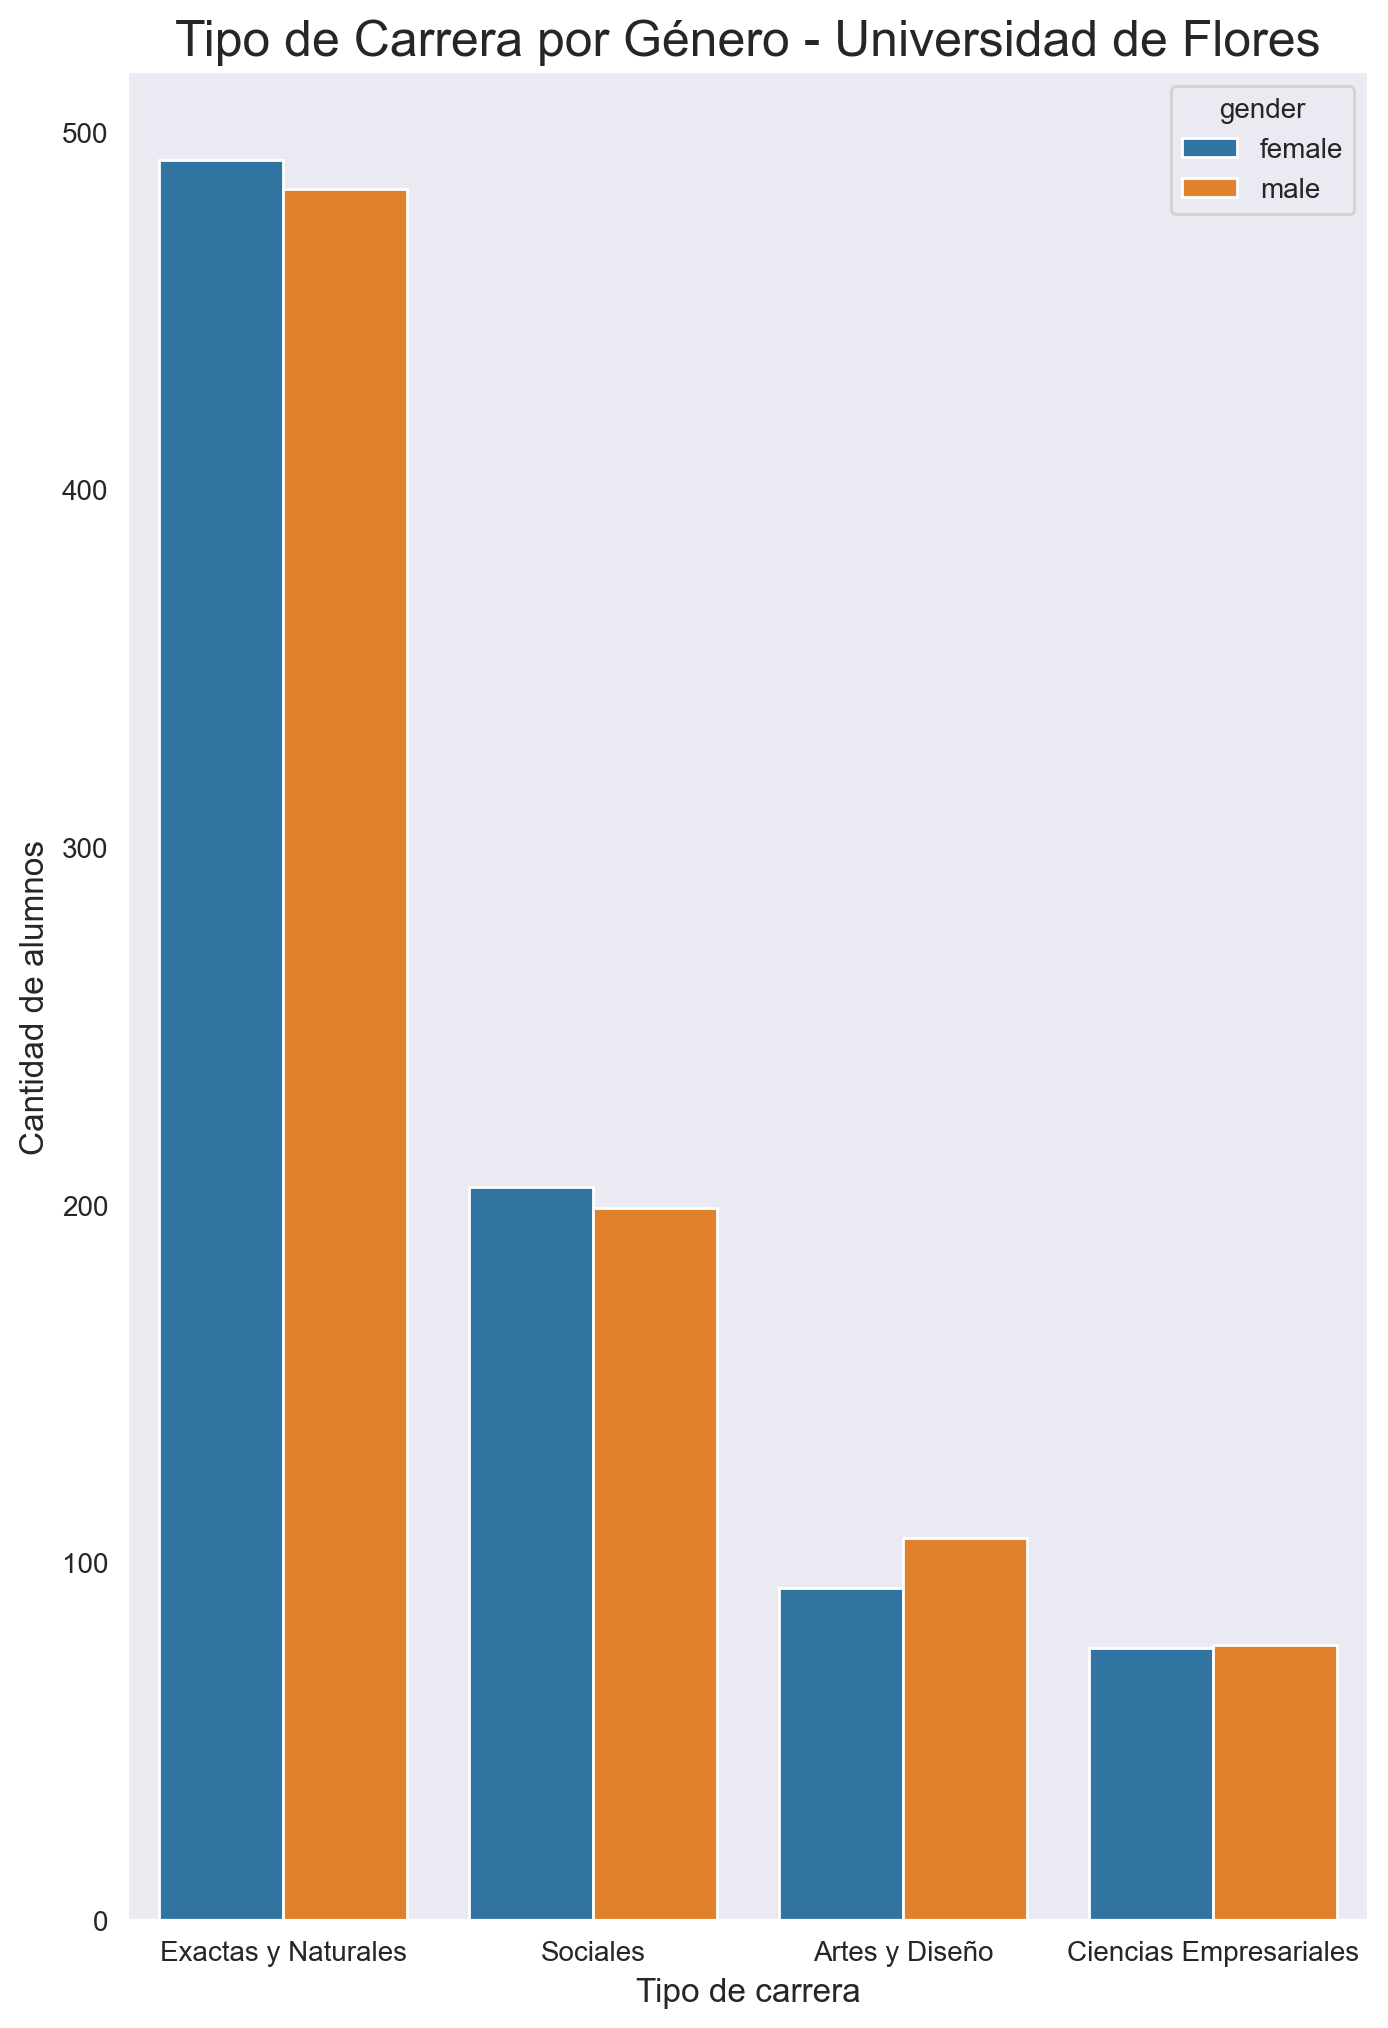

In [49]:
fig = sns.countplot(data=df_1,x='tipo_career', hue='gender')
fig.set_title(f'Tipo de Carrera por Género - {university1_name}',{'fontsize':18})
fig.set_ylabel('Cantidad de alumnos',{'fontsize':12})
fig.set_xlabel('Tipo de carrera',{'fontsize':12})
fig.set_xticklabels(labels=fig.get_xticklabels())

In [50]:
sorted(df_1.career.unique())

['actuario',
 'agronomía',
 'arquitectura',
 'bioquímica',
 'ciencias veterinarias',
 'contador público',
 'diseño de imagen y sonido',
 'diseño industrial',
 'farmacia',
 'ingeniería electrónica',
 'ingeniería en informática',
 'ingeniería mecánica',
 'licenciatura en administración',
 'licenciatura en artes',
 'licenciatura en ciencia política',
 'licenciatura en ciencia y tecnología de alimentos',
 'licenciatura en ciencias ambientales',
 'licenciatura en ciencias antropológicas',
 'licenciatura en ciencias biológicas',
 'licenciatura en ciencias de la computación',
 'licenciatura en ciencias de la educación',
 'licenciatura en ciencias geológicas',
 'licenciatura en gestión de agroalimentos',
 'licenciatura en kinesiología y fisiatría',
 'licenciatura en musicoterapia',
 'licenciatura en planificación y diseño del paisaje',
 'licenciatura en producción de bioimagenes',
 'licenciatura en psicología',
 'licenciatura en relaciones del trabajo',
 'licenciatura en sociología',
 'licenci